# Probabilidad - Variables aleatorias discretas

X es una variable aleatoria discreta si toma valores en un conjunto numerable (finito) x1, ..., xn.

Ej. 
  - Moneda: x1 = cara, x2 = cruz
  - Dado: x1 = 1, x2 = 2, ..., x6 = 6
  
Función de probabilidad: asocia una probabilidad a cada posible valor de X, p1, ..., pn.

Ej.
  - Moneda: P(X = x1) = p1 = 0.5, p2 = 0.5
  - Dado: P(X = x1) = p1 = 1/6, p2 = p3 = ... = p6 = 1/6
  
Se cumple:
  - pi < 1
  - p1 + ... + pn = 1

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

## Distribución uniforme discreta

In [2]:
# p1 = 0.5, p2 = 0.5
# p1 = 1/6, p2 = ... = p6 = 1/6

In [3]:
int(np.random.uniform(1, 7))

5

In [4]:
muestra = 100000
resultado_dado = np.random.uniform(1, 7, size=muestra)
resultado_dado = resultado_dado.astype(int)
resultado_dado

array([6, 3, 4, ..., 5, 3, 1])

In [5]:
numeros, repeticiones = np.unique(resultado_dado, return_counts=True)
print(numeros)
print(repeticiones)
print(repeticiones/muestra)

[1 2 3 4 5 6]
[16651 16801 16657 16610 16605 16676]
[0.16651 0.16801 0.16657 0.1661  0.16605 0.16676]


<BarContainer object of 6 artists>

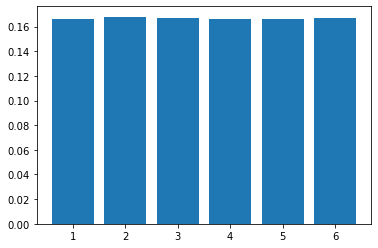

In [6]:
plt.bar(numeros, repeticiones/muestra)

## Distribución de Bernoulli(p)

In [7]:
# P(X = aprobar) = 0.8, P(X = suspender) = 0.2
# Bernouilli(p), p = probabilidad de exito, q = 1-p = probabilidad de fracaso

In [8]:
muestra = 100000
p = 0.8
resultados_alumnos = stats.bernoulli.rvs(p, size=muestra)
resultados_alumnos

array([1, 1, 0, ..., 0, 1, 0])

In [9]:
numeros, repeticiones = np.unique(resultados_alumnos, return_counts=True)
print(numeros)
print(repeticiones)
print(repeticiones/muestra)

[0 1]
[20054 79946]
[0.20054 0.79946]


<BarContainer object of 2 artists>

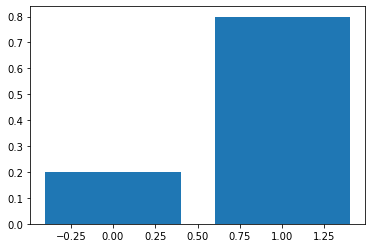

In [10]:
plt.bar(numeros, repeticiones/muestra)

## Distribución Binomial(n, p)

In [11]:
n = 10
p = 0.5

stats.binom.pmf(2, n, p)

0.04394531249999999

In [12]:
# stats.binom.pmf(0, n, p) + stats.binom.pmf(1, n, p) + ... + stats.binom.pmf(10, n, p)

suma_prob = 0
for i in range(0, n+1):
    suma_prob+=stats.binom.pmf(i, n, p)

suma_prob

1.0000000000000009

In [13]:
muestra = 100000
resultados_moneda = stats.binom.rvs(n, p, size=muestra)
resultados_moneda

array([8, 6, 6, ..., 8, 2, 4])

In [14]:
numeros, repeticiones = np.unique(resultados_moneda, return_counts=True)
print(numeros)
print(repeticiones)
print(repeticiones/muestra)

[ 0  1  2  3  4  5  6  7  8  9 10]
[  104   976  4371 11780 20287 24979 20424 11629  4376   966   108]
[0.00104 0.00976 0.04371 0.1178  0.20287 0.24979 0.20424 0.11629 0.04376
 0.00966 0.00108]


<BarContainer object of 11 artists>

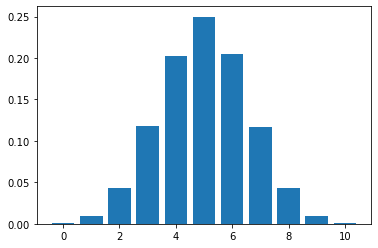

In [15]:
plt.bar(numeros, repeticiones/muestra)

## Distribucion de Poisson(lambda)

In [16]:
# Ej. La kschool recibe 60 emails diarios.
# Maximo se pueden contestar 9 emails/hora (8horas)
# Cual es la prob de que en 1h se reciban 10 emails

lmbda = 60/8

stats.poisson.pmf(10, lmbda)

0.08583037040867346

In [17]:
suma_prob = 0
for i in range(0, 61):
    suma_prob+=stats.poisson.pmf(i, lmbda)
    
suma_prob

0.9999999999999991

In [18]:
muestra = 10000000
resultado_emails = stats.poisson.rvs(lmbda, size=muestra)
resultado_emails

array([ 5,  7,  4, ..., 10, 14,  4])

In [19]:
numeros, repeticiones = np.unique(resultado_emails, return_counts=True)
print(numeros)
print(repeticiones)
print(repeticiones/muestra)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
[   5547   41383  155545  388366  728422 1093173 1368822 1463552 1374608
 1144989  856975  585156  366134  211448  113153   56675   26474   11574
    5003    1884     727     271      83      22       6       6       2]
[5.547000e-04 4.138300e-03 1.555450e-02 3.883660e-02 7.284220e-02
 1.093173e-01 1.368822e-01 1.463552e-01 1.374608e-01 1.144989e-01
 8.569750e-02 5.851560e-02 3.661340e-02 2.114480e-02 1.131530e-02
 5.667500e-03 2.647400e-03 1.157400e-03 5.003000e-04 1.884000e-04
 7.270000e-05 2.710000e-05 8.300000e-06 2.200000e-06 6.000000e-07
 6.000000e-07 2.000000e-07]


In [20]:
np.mean(resultado_emails)

7.5008951

<BarContainer object of 27 artists>

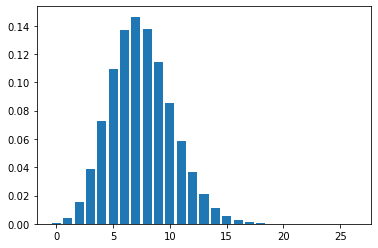

In [21]:
plt.bar(numeros, repeticiones/muestra)

# Ejemplo

 - casa_unifamiliar
 - habitaciones
 
Ejercicio:
 - Encontrar la distribución
 - Encontrar los parámetros de la distribución
 - Si escojo un piso al azar, cual es la probabilidad de que sea una vivienda unifamiliar?
 - Si escojo un piso al azar, cual es la probabilidad de que tenga exactamente 3 habitaciones? y de que tenga más de 6 habitaciones?

In [44]:
casas = pd.read_csv('house_pricing.csv')

<BarContainer object of 2 artists>

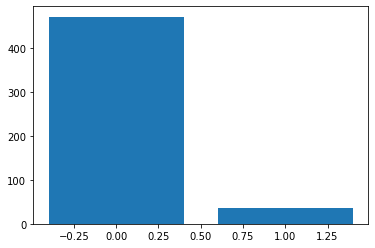

In [45]:
freq = casas['casa_unifamiliar'].value_counts()
plt.bar(freq.index.values, freq)

In [24]:
# casa_unifamiliar ~ Bernoulli(0.07)
freq/len(casas)

0.0    0.93083
1.0    0.06917
Name: casa_unifamiliar, dtype: float64

In [46]:
muestra = 1000000
p = 0.07

resultado = stats.bernoulli.rvs(p, size=muestra)
numero, repeticiones = np.unique(resultado, return_counts=True)

Text(0.5, 1.0, 'Sample')

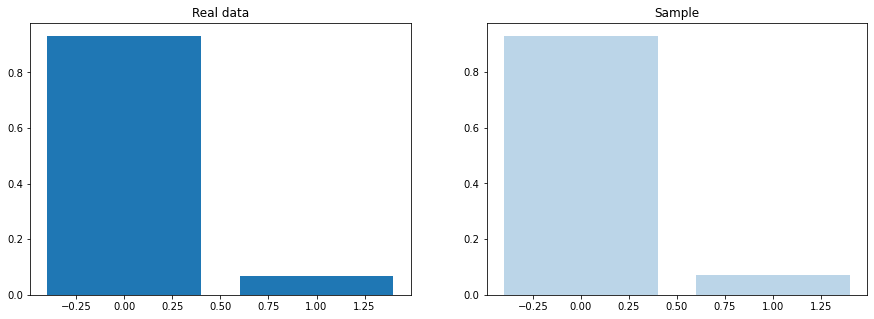

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].bar([0,1], freq/len(casas))
ax[0].set_title('Real data')
ax[1].bar([0,1], repeticiones/muestra, alpha = 0.3)
ax[1].set_title('Sample')

In [27]:
# La probabilidad de que si escojo una vivienda al azar esta sea unifamiliar, es de 7%

<BarContainer object of 7 artists>

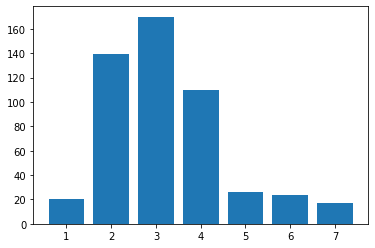

In [28]:
freq = casas['habitaciones'].value_counts()
plt.bar(freq.index.values, freq)

In [29]:
lmbda = casas['habitaciones'].mean()
lmbda

3.2430830039525693

In [30]:
muestra = 100000
resultado = stats.poisson.rvs(lmbda, size=muestra)
numeros, repeticiones = np.unique(resultado, return_counts=True)

Text(0.5, 1.0, 'Sample')

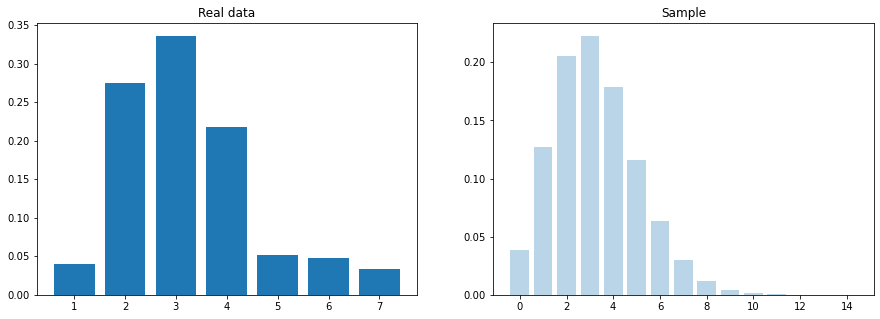

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].bar(freq.index.values, freq/sum(freq))
ax[0].set_title('Real data')
ax[1].bar(numeros, repeticiones/muestra, alpha = 0.3)
ax[1].set_title('Sample')

In [32]:
stats.poisson.pmf(3, lmbda)

0.2219575330951537

In [33]:
suma_prob = 0
for i in range(6, 20):
    suma_prob+=stats.poisson.pmf(i, lmbda)
    
suma_prob

0.11037791464242636

In [34]:
# La probabilidad de que un piso tenga 3hab es de 22%, y la prob de que un piso tenga 6 o mas habitaciones es del 11%.

In [35]:
1 - stats.poisson.pmf(0, lmbda) - stats.poisson.pmf(1, lmbda) - stats.poisson.pmf(2, lmbda) - stats.poisson.pmf(3, lmbda) - stats.poisson.pmf(4, lmbda) - stats.poisson.pmf(5, lmbda)

0.11037791495633181

# Variables aleatorias continuas

Funcion de distribucion F(X) -> prob(60 < x < 80)

Se cumple:
  - en cada intervalo prob < 1
  - en el intervalo prob = 1

## distribucion Normal(mu, sigma)

In [36]:
mu = 1.7
sigma = 0.15

stats.norm.cdf(1.8, mu, sigma) # probabilidad de que mida 1.8 o menos

0.7475074624530773

In [37]:
# probabilidad de que mida mas de 1.9 (= 1 - prob de que mida menos de 1.9)
1 - stats.norm.cdf(1.9, mu, sigma)

0.09121121972586788

In [38]:
# probabilidad de que mida entre 1.8 y 1.9
stats.norm.cdf(1.9, mu, sigma) - stats.norm.cdf(1.8, mu, sigma)

0.16128131782105481

In [39]:
muestra = 100000
resultado_altura = stats.norm.rvs(mu, sigma, size=muestra)
resultado_altura

array([1.55750554, 1.88028642, 1.54602514, ..., 1.8767628 , 1.7233668 ,
       1.54176647])

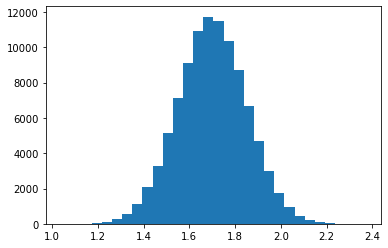

In [40]:
plt.hist(resultado_altura, bins = 30);

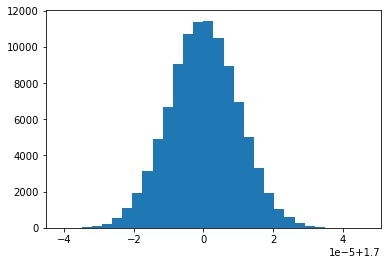

In [41]:
mu = 1.7
sigma = 0.00001
resultado_altura = stats.norm.rvs(mu, sigma, size=muestra)
plt.hist(resultado_altura, bins = 30);

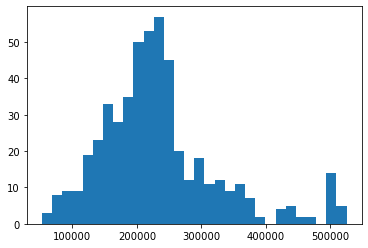

In [42]:
plt.hist(casas['precio'], bins = 30);

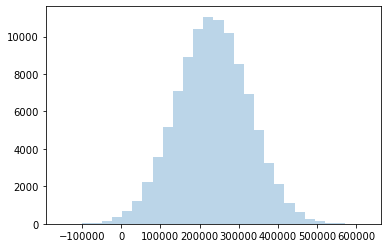

In [43]:
mu = casas['precio'].mean()
sigma = casas['precio'].std()

muestra = 100000
resultado = stats.norm.rvs(mu, sigma, size=muestra)
plt.hist(resultado, bins = 30, alpha=0.3);